In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate



# 1. Nyquist, sampling and aliasing

## a. Generate a monochromatic signal

We start by generating a simple monochromatic signal, a sinusoid with constant frequency

In [68]:
def generate_sinusoid(duration, amplitude, frequency, phase_offset, sampling_frequency, plot=False):
    """
    Generate a sinusoid signal.

    Parameters:
        duration (float): Duration of the signal in seconds.
        amplitude (float): Amplitude of the sinusoid.
        frequency (float): Frequency of the sinusoid in Hertz.
        phase_offset (float): Phase offset of the sinusoid in radians.
        sampling_frequency (float): Sampling frequency in Hertz.

    Returns:
        numpy.ndarray: Generated sinusoid signal.
        numpy.ndarray: Corresponding time vector.
    """
    num_samples = int(duration * sampling_frequency)
    t = np.arange(0, duration, 1 / sampling_frequency)
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase_offset)
    
    if plot:
        plt.figure(figsize=(12, 4))
        plt.plot(t, signal)
        plt.xlim(t.min(), t.max())
        plt.title('Generated Sinusoid Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()    
        
    return signal, t


You can use the function like so:

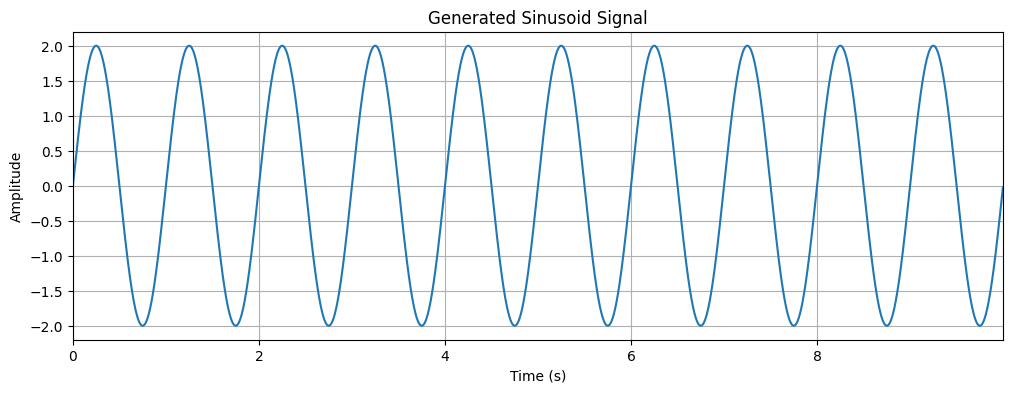

In [69]:
sinusoid_signal, time_vector = generate_sinusoid(
    duration=10.0,
    amplitude=2.0,
    frequency=1,
    phase_offset=0,
    sampling_frequency=500,
    plot=True
)

What happens when you change the sampling frequency of the same sinusoid ? 
Let's define a function to show the effect of the sampling frequency

In [70]:
def generate_sinusoid_with_different_sampling_frequencies(    
    duration=10.0,
    amplitude=2.0,
    frequency=1,
    phase_offset=0,
    sampling_frequencies=[500,1],
    fit=False):
    
    sinusoid_signal_1, time_vector_1 = generate_sinusoid(duration=duration, amplitude=amplitude, frequency=frequency,
    phase_offset=phase_offset, sampling_frequency=sampling_frequencies[0])
    
    sinusoid_signal_2, time_vector_2 = generate_sinusoid(duration=duration, amplitude=amplitude, frequency=frequency,
    phase_offset=phase_offset, sampling_frequency=sampling_frequencies[1])    
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_vector_1, sinusoid_signal_1,label=f'Sampled at {sampling_frequencies[0]} Hz')
    plt.plot(time_vector_2, sinusoid_signal_2,'ro',label=f'Sampled at {sampling_frequencies[1]} Hz')

    plt.xlim(time_vector_1.min(), time_vector_1.max())

    if fit:
        f = interpolate.interp1d(time_vector_2, sinusoid_signal_2,kind='quadratic')
        xnew = np.arange(time_vector_2.min(),time_vector_2.max(),0.01)
        ynew = f(xnew)   # use interpolation function returned by `interp1d`
        plt.plot(xnew, ynew, 'r--')

    plt.title(f'Generated Sinusoid Signal at {frequency} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper left')
    plt.grid(True)


You can use it like so :

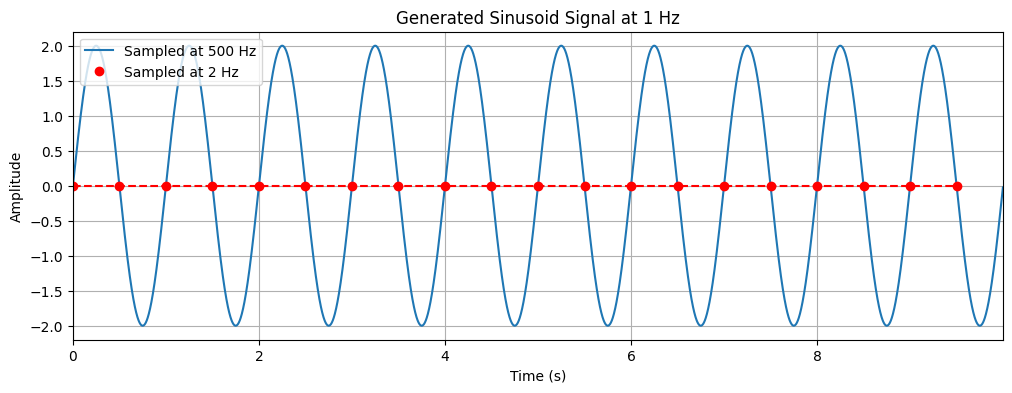

In [71]:
generate_sinusoid_with_different_sampling_frequencies(frequency=1,sampling_frequencies=[500,2],fit=True)

Here we have a sinusoid with frequency=1 Hz, sampled at 500 Hz and sampled at 2 Hz.
What do you notice ? 

What happens when you increase the sampling frequency from 2Hz to 3Hz ? 

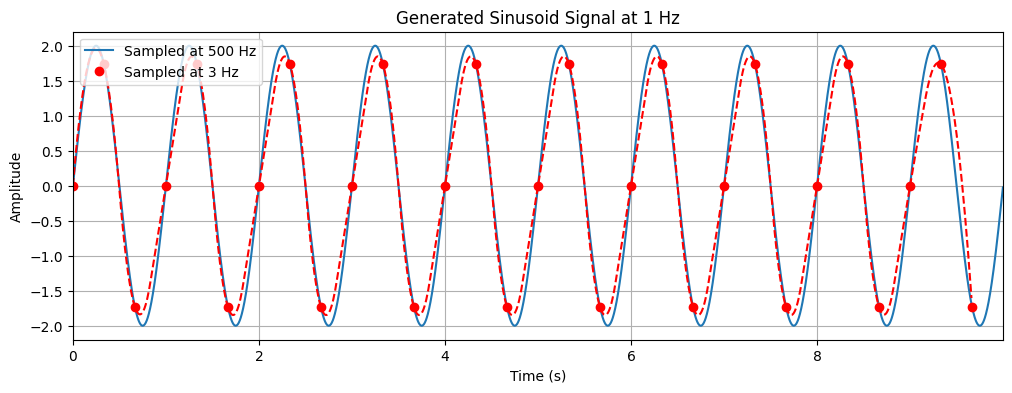

In [72]:
generate_sinusoid_with_different_sampling_frequencies(frequency=1,sampling_frequencies=[500,3],fit=True)

and if we increase it to 4 Hz ? 

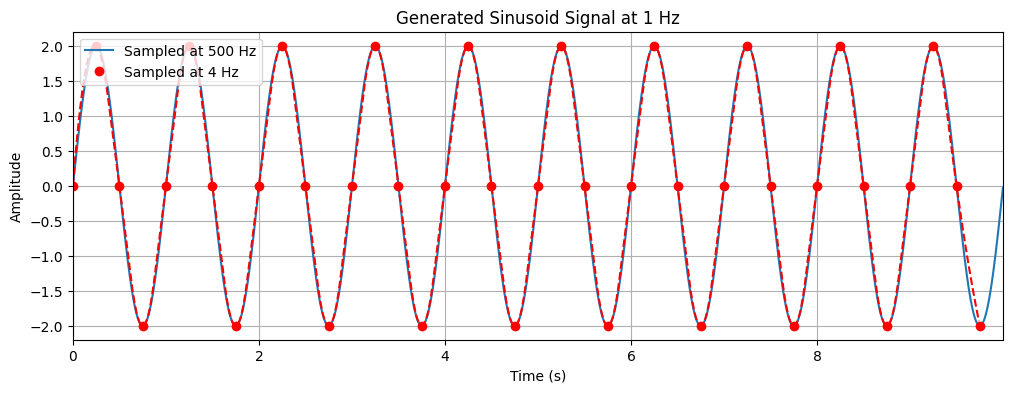

In [73]:
generate_sinusoid_with_different_sampling_frequencies(frequency=1,sampling_frequencies=[500,4],fit=True)

### Create audio from signal

This doesn't seem to work on my computer currently ...

In [74]:
import IPython.display as ipd
ipd.display(ipd.Audio(sinusoid_signal, rate=500))

## b. Complex signal

In [75]:
def generate_complex_signal(duration, components,sampling_frequency=100.0,plot=False):
    """
    Generate a complex signal as a combination of multiple sinusoidal components.

    Parameters:
        duration (float): Duration of the signal in seconds.
        components (list of tuples): List of tuples, where each tuple contains:
            - amplitude (float): Amplitude of the sinusoid component.
            - frequency (float): Frequency of the sinusoid component in Hertz.
            - phase_offset (float): Phase offset of the sinusoid component in radians.

    Returns:
        numpy.ndarray: Generated complex signal.
        numpy.ndarray: Corresponding time vector.
    """
    t = np.arange(0, duration, 1 / sampling_frequency)
    signal = np.zeros_like(t)

    for amp, freq, phase in components:
        signal += amp * np.sin(2 * np.pi * freq * t + phase)

    if plot:
        # Plot the complex signal
        plt.figure(figsize=(12, 4))
        plt.plot(t, signal,label=f'Sampled at {sampling_frequency} Hz')
        plt.title('Generated Complex Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.xlim(t.min(), t.max())
        plt.legend()
        plt.grid(True)
        plt.show()

    return signal, t



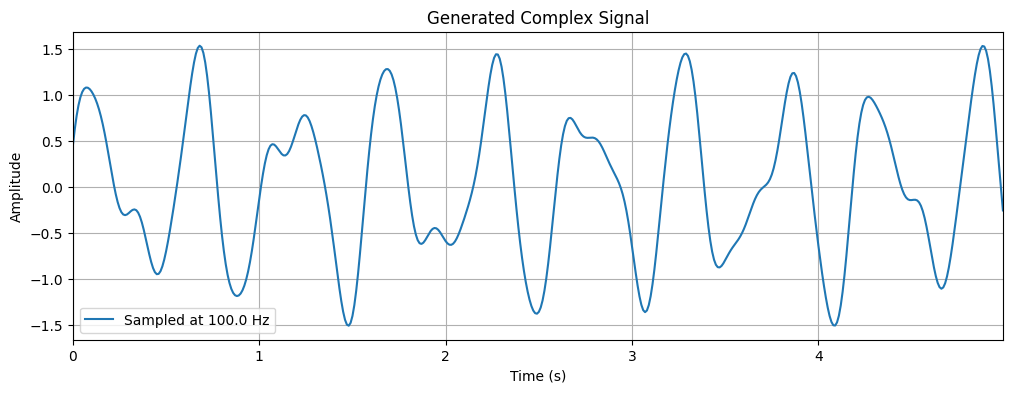

In [76]:

# Define components: (amplitude, frequency, phase)
components = [
    (1.0, 1.9, 0.0),
    (0.5, 3.1, np.pi / 4),
    (0.1, 5.7, np.pi / 2),
]

# Generate the complex signal
complex_signal, time_vector = generate_complex_signal(duration=5, components=components,plot=True)


In [77]:
def generate_complex_signal_with_different_sampling_frequencies(    
    duration, 
    components,
    sampling_frequencies=[500,1],
    fit=False):
    
    sinusoid_signal_1, time_vector_1 = generate_complex_signal(duration=duration, components=components,
                                                              sampling_frequency=sampling_frequencies[0])
    
    sinusoid_signal_2, time_vector_2 = generate_complex_signal(duration=duration, components=components,
                                                              sampling_frequency=sampling_frequencies[1])
        
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_vector_1, sinusoid_signal_1,label=f'Sampled at {sampling_frequencies[0]} Hz')
    plt.plot(time_vector_2, sinusoid_signal_2,'ro',label=f'Sampled at {sampling_frequencies[1]} Hz')

    plt.xlim(time_vector_1.min(), time_vector_1.max())

    if fit:
        f = interpolate.interp1d(time_vector_2, sinusoid_signal_2,kind='quadratic')
        xnew = np.arange(time_vector_2.min(),time_vector_2.max(),0.01)
        ynew = f(xnew)   # use interpolation function returned by `interp1d`
        plt.plot(xnew, ynew, 'r--')

    plt.title(f'Generated complex Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    #return [],[]


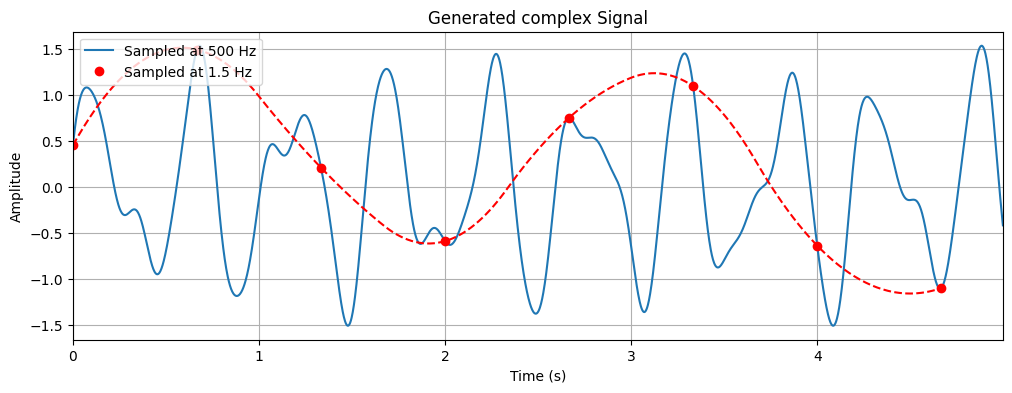

In [78]:
components = [
    (1.0, 1.9, 0.0),
    (0.5, 3.1, np.pi / 4),
    (0.1, 5.7, np.pi / 2),
]

generate_complex_signal_with_different_sampling_frequencies(duration=5,
                                                            components=components,
                                                            sampling_frequencies=[500,1.5],
                                                            fit=True)

# Power Spectrum Density

In [79]:
from scipy import signal

## a. Using Fourrier

Text(0, 0.5, 'PSD [V**2/Hz]')

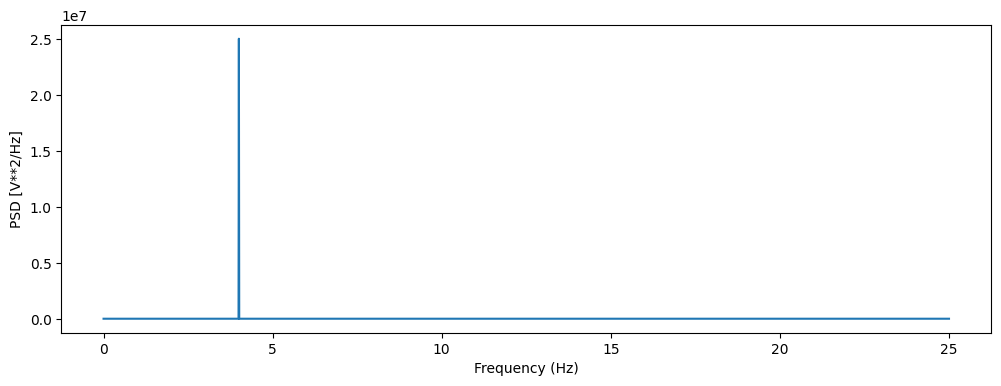

In [107]:
sampling_frequency= 50
sinusoid_signal, time_vector = generate_sinusoid(
    duration=100.0,
    amplitude=2.0,
    frequency=4,
    phase_offset=0,
    sampling_frequency=sampling_frequency,
    plot=False
)

xF = np.fft.fft(sinusoid_signal)
N = len(xF)
xF = xF[0:N//2]
fr = np.linspace(0,sampling_frequency//2,N//2)

plt.figure(figsize=(12, 4))
plt.plot(fr,abs(xF)**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD [V**2/Hz]')


## b. Periodogram

We can also use the scipy.signal.periodogram function.
What are the differences from our previous implementation ? See the scipy online manual for reference

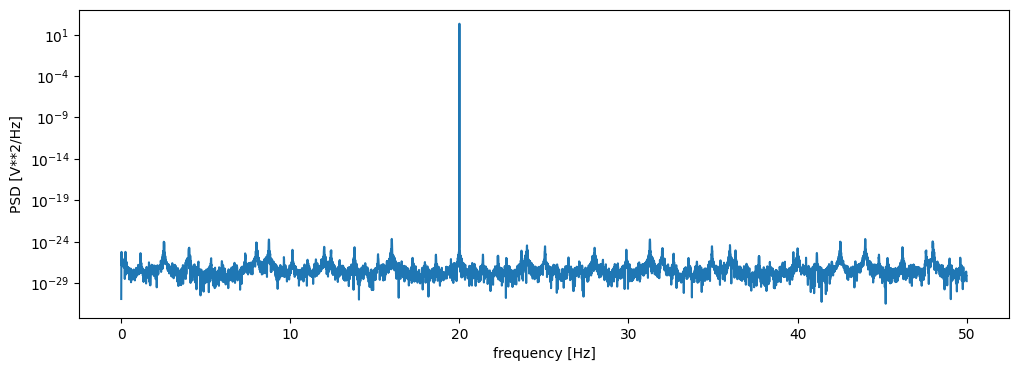

In [81]:

sampling_frequency= 100
sinusoid_signal, time_vector = generate_sinusoid(
    duration=100.0,
    amplitude=2.0,
    frequency=20,
    phase_offset=0,
    sampling_frequency=sampling_frequency,
    plot=False
)

f, Pxx_den = signal.periodogram(sinusoid_signal, sampling_frequency)
plt.figure(figsize=(12, 4))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

We can try with a complex signal now:

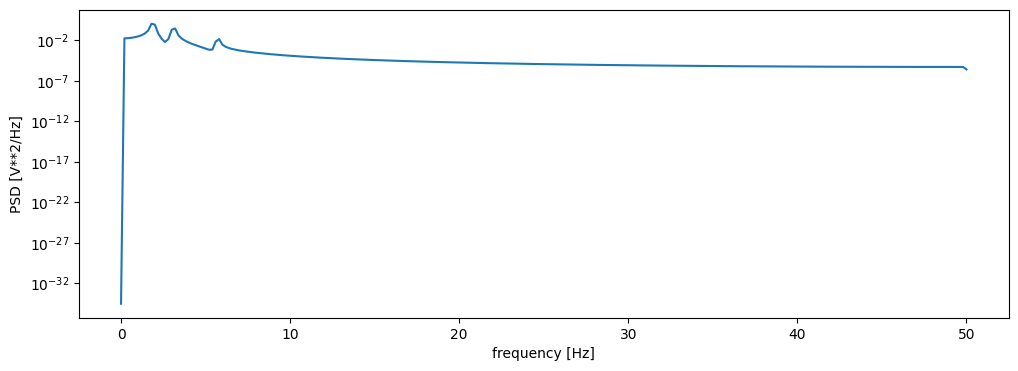

In [82]:
# Define components: (amplitude, frequency, phase)
components = [
    (1.0, 1.9, 0.0),
    (0.5, 3.1, np.pi / 4),
    (0.1, 5.7, np.pi / 2),
]

# Generate the complex signal
complex_signal, time_vector = generate_complex_signal(duration=5,
                                                      sampling_frequency=sampling_frequency,
                                                      components=components)

f, Pxx_den = signal.periodogram(complex_signal, sampling_frequency)
plt.figure(figsize=(12, 4))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.ylim(10e-4,10)
plt.show()

 What happens when you change the duration of the signal ? Why ? 

## c. Welch's method

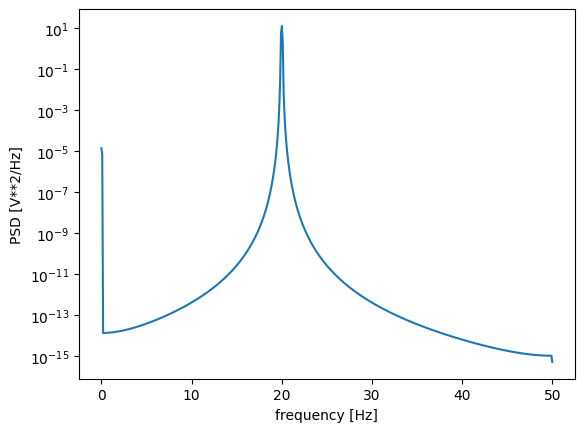

In [83]:

sampling_frequency= 100
sinusoid_signal, time_vector = generate_sinusoid(
    duration=100.0,
    amplitude=2.0,
    frequency=20,
    phase_offset=0,
    sampling_frequency=sampling_frequency,
    plot=False
)

f, Pxx_den = signal.welch(sinusoid_signal, sampling_frequency, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

 What is happening here ? check the signal.welch info in the scipy manual. 
 What is nperseg? Try changing the nperseg, the length of the signal, the 'average' method used in Welch's .

# Aliasing on PSD 

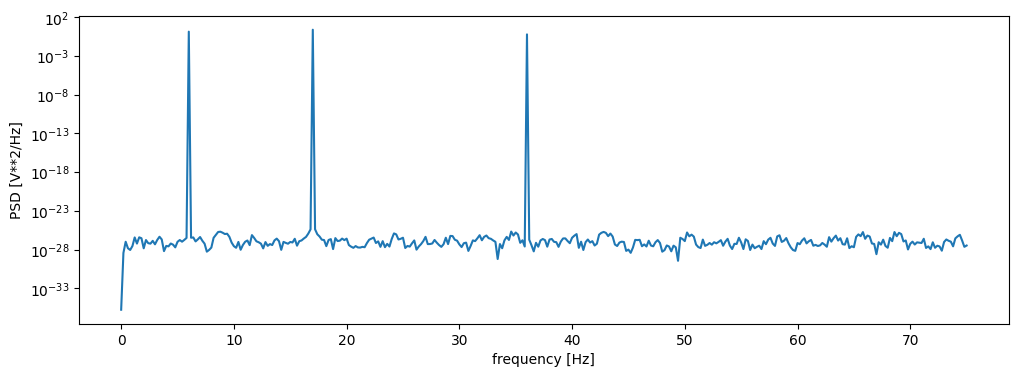

In [84]:
# Define components: (amplitude, frequency, phase)
components = [
    (1.0, 433, 0.0),
    (0.75, 144, np.pi / 4),
    (0.5, 36, np.pi / 2),
]

sampling_frequency= 150

# Generate the complex signal
complex_signal, time_vector = generate_complex_signal(duration=5,
                                                      sampling_frequency=sampling_frequency,
                                                      components=components)

f, Pxx_den = signal.periodogram(complex_signal, sampling_frequency)
plt.figure(figsize=(12, 4))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.ylim(10e-4,10)
plt.show()

Show which peaks in the PSD are due to aliasing and those who are not. Work out the minimal sampling frequency necessary to avoid aliasing. 

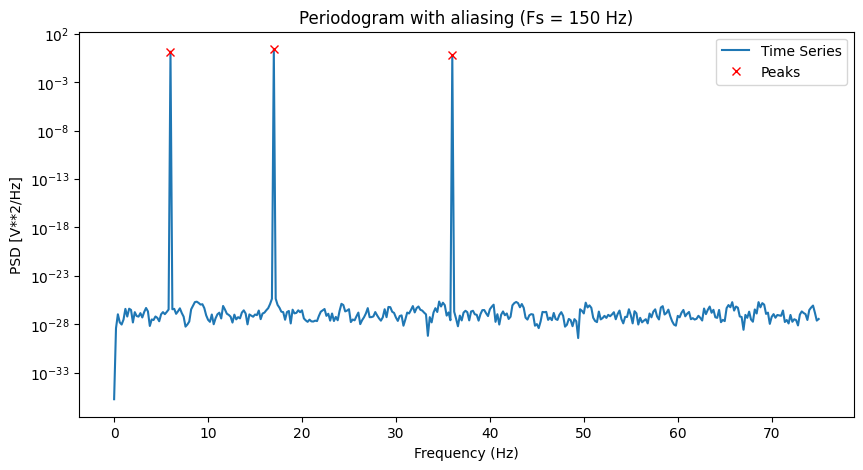

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

f, Pxx_den = signal.periodogram(complex_signal, sampling_frequency)

# Finding peaks
prominence_value = 0.3  # Set the desired prominence

peaks, _ = find_peaks(Pxx_den, prominence=prominence_value)  # prominence can be adjusted, see scipy online manual

# Extracting x/y values of peaks
peak_times = f[peaks]
peak_values = Pxx_den[peaks]

# Plotting
plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx_den, label='Time Series')
plt.semilogy(peak_times, peak_values, 'rx', label='Peaks')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD [V**2/Hz]')
plt.title(f'Periodogram with aliasing (Fs = {sampling_frequency} Hz)')
plt.legend()

Change the sampling frequency to 25, 50, 100, 500 and 1000 Hz. What do you notice ? 

# Final exercise

Generate a plot that shows the evolution of observed frequency as a function of the sampling rate. Do this for ~20 different sampling frequencies.